# Utilities and Imports

In [9]:
import numpy as np #Mathematical Operations
import matplotlib.pyplot as pl #Visualizations
import pandas as pd #Dataframe manipulation
from datetime import datetime as dt#Datatime manipulation


df = pd.read_csv("/Users/wdaugherty/ORIE-5530/ORIE-5530/Project/202207-citbike-tripdata.csv", delimiter=",") #Load in the data

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_4612/3829226322.py:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/wdaugherty/ORIE-5530/ORIE-5530/Project/202207-citbike-tripdata.csv", delimiter=",") #Load in the data


# Warmup 

## Data Descriptions 

In [10]:
#Data Descriptions 
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member


In [14]:
#Print times based on duration 
durations = []
for index, row in df.iterrows():
    start = dt.strptime((row["started_at"]), "%Y-%m-%d %H:%M:%S")
    end = dt.strptime((row["ended_at"]), "%Y-%m-%d %H:%M:%S")
    durations.append((end-start).total_seconds() / 60)
    
    #if len(durations) % 200000 == 0:
     #   print(len(durations))

## Part 1

In [24]:
#Filter for duration 
df['duration'] = durations
durations_df=df[df['duration']<=180]
durations_df = durations_df[durations_df['duration']>=0]

Text(0.5, 1.0, 'Trip Duration vs. Frequency')

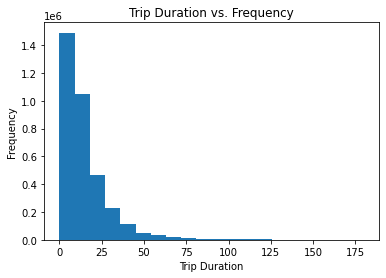

In [25]:
#Plots the data 
pl.hist(durations_df['duration'], bins=20)
pl.xlabel("Trip Duration")
pl.ylabel("Frequency")
pl.title("Trip Duration vs. Frequency")

## Part 2

In [17]:
mean_duration=durations_df['duration'].mean()
print("Expected ride duration is ", mean_duration, "minutes")

Expected ride duration is  14.993813519267052 minutes


In [18]:
var_duration= durations_df['duration'].var()
print("variance of ride duration is ", var_duration, "minutes")

variance of ride duration is  232.8328785622765 minutes


In [40]:
prob= len(durations_df[durations_df['duration']>20])/len(durations_df['duration'])
print("The probability that the duration of the trip is greater than 20 minutes is ", prob)

The probability that the duration of the trip is greater than 20 minutes is  0.2327215395657151


## Part 3

In [20]:
member= durations_df[durations_df['member_casual']=='member']
prob_member= len(member[member['duration']>20])/len(member)
print("The probability that the duration of the trip is greater than 20 minutes given that the rider is a member is ", prob_member)

The probability that the duration of the trip is greater than 20 minutes given that the rider is a member is  0.18609139832749863


## Part 4

In [21]:
prob_25_member= len(member[member['duration']>25])/len(member)
prob_member= len(member)/len(durations_df)
prob_25= len(durations_df[durations_df['duration']>25])/len(durations_df['duration'])
prob_member_given_ride_greater25= (prob_25_member*prob_member)/prob_25
prob_member_given_ride_greater25

0.5839272451304628

## Part 5

In [45]:
#Expected Value of Electric Bike
classic = df.groupby(df['rideable_type']).get_group('electric_bike')
mean_duration= classic['duration'].mean()
print("Expected ride duration is ", mean_duration, "minutes")

Expected ride duration is  18.378049011202773 minutes


In [46]:
#Expected Value of Classic Bike 
electric = df.groupby(df['rideable_type']).get_group('classic_bike')

mean_duration= electric['duration'].mean()
print("Expected ride duration is ", mean_duration, "minutes")

Expected ride duration is  17.406528374412954 minutes


## Part 6

In [47]:
prob_10_ebike= len(electric[electric['duration']<10])/len(electric)
prob_ebike= len(electric)/len(durations_df)
prob_10= len(durations_df[durations_df['duration']<10])/len(durations_df['duration'])
prob_ebike_less_10= (prob_10_ebike*prob_member)/prob_10
prob_ebike_less_10

0.7701967556006271

In [48]:
prob_10_classic= len(classic[classic['duration']<10])/len(classic)
prob_classic= len(classic)/len(durations_df)
prob_10= len(durations_df[durations_df['duration']<10])/len(durations_df['duration'])
prob_classic_less_10= (prob_10_classic*prob_member)/prob_10
prob_classic_less_10

0.7493888466596276

# Markov Chains

In [28]:
#Choose stations 
stations_df=durations_df[(durations_df['start_station_name']=="7 Ave & Central Park South") | 
                        (durations_df['end_station_name']=="7 Ave & Central Park South") |
                        (durations_df['start_station_name']=="E 17 St & Broadway") |
                        (durations_df['end_station_name']=="E 17 St & Broadway")|
                        (durations_df['start_station_name']=="W 21 St & 6 Ave") | 
                        (durations_df['end_station_name']=="W 21 St & 6 Ave")]

stations_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
189136,12940E591FE8BD47,electric_bike,2022-07-04 13:51:01,2022-07-04 14:59:19,W 22 St & 10 Ave,6306.06,7 Ave & Central Park South,6912.01,40.746920,-74.004519,40.766741,-73.979069,casual,68.300000
189137,82371C2D1FF4DDAE,classic_bike,2022-07-02 17:10:07,2022-07-02 17:37:06,Washington Pl & Broadway,5755.01,7 Ave & Central Park South,6912.01,40.729039,-73.994046,40.766741,-73.979069,member,26.983333
189140,8DBC9374AD2F81A1,electric_bike,2022-07-28 13:38:29,2022-07-28 13:47:35,W 47 St & 6 Ave,6667.04,7 Ave & Central Park South,6912.01,40.758397,-73.982550,40.766741,-73.979069,member,9.100000
189146,9D0045DE7B3F189A,classic_bike,2022-07-26 07:58:39,2022-07-26 08:35:33,Hudson St & Reade St,5359.1,7 Ave & Central Park South,6912.01,40.716250,-74.009106,40.766741,-73.979069,member,36.900000
189147,065FDAA3C5613267,classic_bike,2022-07-12 17:37:35,2022-07-12 17:47:38,E 50 St & Park Ave,6659.1,7 Ave & Central Park South,6912.01,40.757334,-73.974235,40.766741,-73.979069,member,10.050000
